In [142]:
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

import sklearn

studentInfoEdited = pd.read_csv(pathlib.Path.cwd() / 'Data' / 'studentInfoEdited.csv')

## Analysis

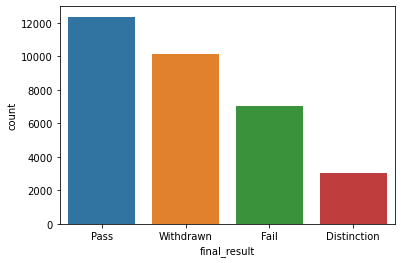

In [143]:
sns.countplot(x='final_result', data =studentInfoEdited)

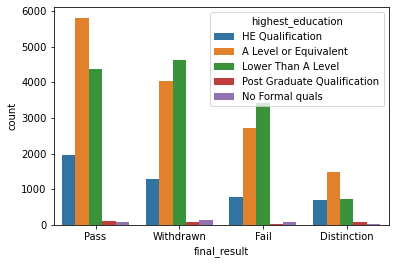

In [144]:
sns.countplot(x='final_result', hue='highest_education', data =studentInfoEdited)

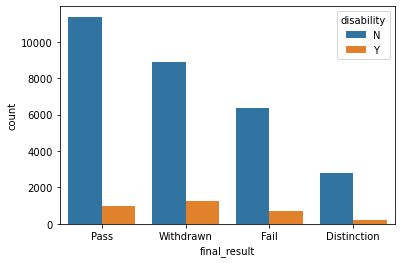

In [145]:
sns.countplot(x='final_result', hue='disability', data =studentInfoEdited)

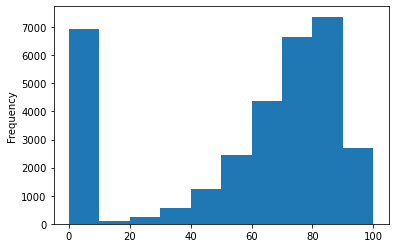

In [146]:
studentInfoEdited['Average_Assesment_Score'].plot.hist()

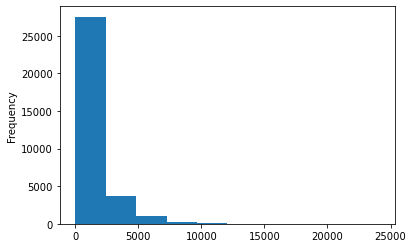

In [147]:
studentInfoEdited['Total_no_of_material_use'].plot.hist()

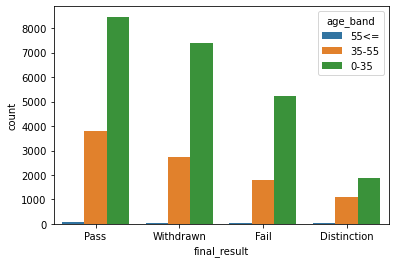

In [148]:
sns.countplot(x='final_result', hue='age_band', data =studentInfoEdited)

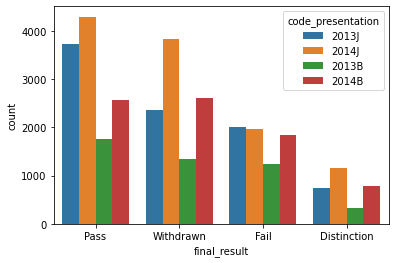

In [149]:
sns.countplot(x='final_result', hue='code_presentation', data =studentInfoEdited)

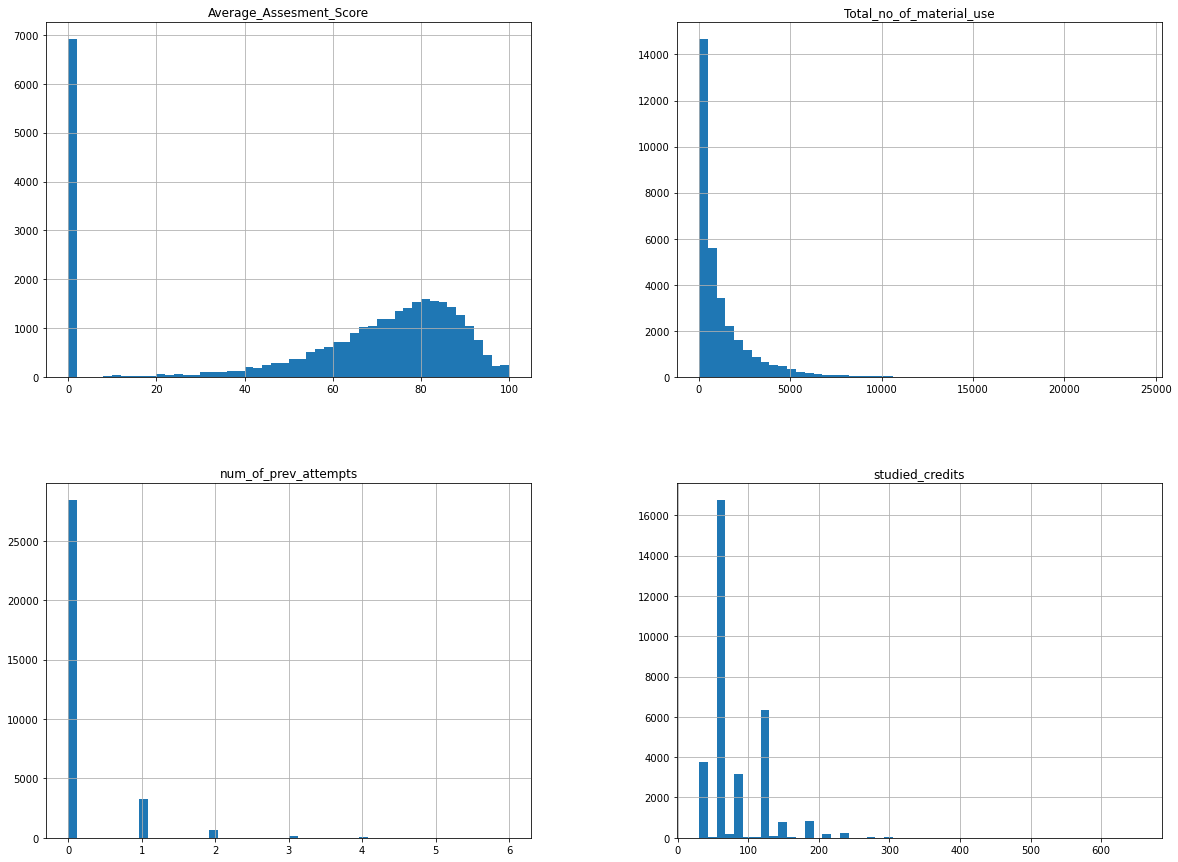

In [150]:
studentInfoEdited.hist(bins=50, figsize=(20,15))
plt.show()

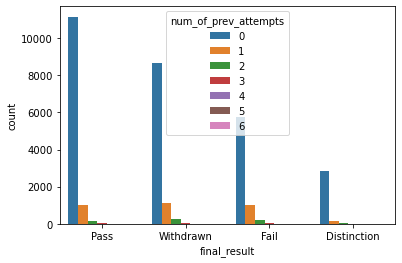

In [151]:
sns.countplot(x='final_result', hue='num_of_prev_attempts', data =studentInfoEdited)

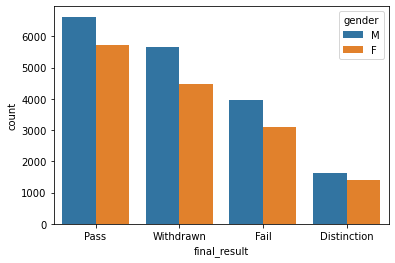

In [152]:
sns.countplot(x='final_result', hue='gender', data =studentInfoEdited)

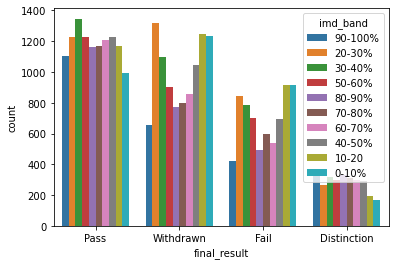

In [153]:
sns.countplot(x='final_result', hue='imd_band', data =studentInfoEdited)

## Data Cleaning

In [154]:
studentInfoEdited = pd.read_csv(pathlib.Path.cwd() / 'Data' / 'studentInfoEdited.csv')

# get rid of all rows with nulls
studentInfoEdited.dropna(inplace=True)
# one hot encode every column that is a string value excpet fianl_result
# each bunch of columns is one less than it should be since we can get rid of one column asit is redundant to list it
# whenever having all zeros in the other columns would represent a tick in that column
# Each column given a prefix of initlas to link it to the original column name
code_module = pd.get_dummies(studentInfoEdited['code_module']).add_prefix('CM'+'= ')
code_presentation = pd.get_dummies(studentInfoEdited['code_presentation']).add_prefix('CP'+'= ')
region = pd.get_dummies(studentInfoEdited['region']).add_prefix('R'+'= ')
highest_education = pd.get_dummies(studentInfoEdited['highest_education']).add_prefix('HE'+'= ')
imd_band = pd.get_dummies(studentInfoEdited['imd_band']).add_prefix('IB'+'= ')
age_band = pd.get_dummies(studentInfoEdited['age_band']).add_prefix('AB'+'= ')
#
disability = pd.get_dummies(studentInfoEdited['disability'], drop_first=True)
disability.rename(columns={'Y': 'Disability', 'N': 'No Disability'}, inplace=True)
#
gender = pd.get_dummies(studentInfoEdited['gender'], drop_first=True)
gender.rename(columns={'M': 'Male', 'F': 'Female'}, inplace=True)

In [155]:
# join all the columns to the original table and remove the now pointless columns
columns = [code_module, code_presentation, gender, region, highest_education, imd_band, age_band, disability]
columnNames = ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']
count = 0
for i in columns:
    studentInfoEdited = pd.concat([studentInfoEdited, i], axis=1)
    # remove the original columns
    studentInfoEdited = studentInfoEdited.drop([columnNames[count]], axis=1)
    count += 1

In [156]:
studentInfoEdited.head()

,num_of_prev_attempts,studied_credits,final_result,Average_Assesment_Score,Total_no_of_material_use,CM= AAA,CM= BBB,CM= CCC,CM= DDD,CM= EEE,...,IB= 40-50%,IB= 50-60%,IB= 60-70%,IB= 70-80%,IB= 80-90%,IB= 90-100%,AB= 0-35,AB= 35-55,AB= 55<=,Disability
0,0,240,Pass,82.0,934.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,60,Pass,66.4,1435.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,60,Withdrawn,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,60,Pass,76.0,2158.0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,60,Pass,54.4,1034.0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [128]:
# We need to scale the data 
from sklearn import preprocessing
minmaxscaler = preprocessing.MinMaxScaler()
# for Total_no_of_material_use
array1= []
for i in studentInfoEdited["Total_no_of_material_use"]:
    array1.append([i])
Total_no_of_material_use_scaled = minmaxscaler.fit_transform(array1)
array1 = []
for i in Total_no_of_material_use_scaled:
    for j in i:
        array1.append(j)
studentInfoEdited["Total_no_of_material_use"] = array1

# for studied_credits
array1 = []
for i in studentInfoEdited["studied_credits"]:
    array1.append([i])
studied_credits_scaled = minmaxscaler.fit_transform(array1)
array1 = []
for i in studied_credits_scaled:
    for j in i:
        array1.append(j)
studentInfoEdited["studied_credits"] = array1

# for Average_Assesment_Score
array1 = []
for i in studentInfoEdited["Average_Assesment_Score"]:
    array1.append([i])
Average_Assesment_Score_scaled = minmaxscaler.fit_transform(array1)
array1 = []
for i in Average_Assesment_Score_scaled:
    for j in i:
        array1.append(j)
studentInfoEdited["Average_Assesment_Score"] = array1

studentInfoEdited.head()

,num_of_prev_attempts,studied_credits,final_result,Average_Assesment_Score,Total_no_of_material_use,CM= AAA,CM= BBB,CM= CCC,CM= DDD,CM= EEE,...,IB= 40-50%,IB= 50-60%,IB= 60-70%,IB= 70-80%,IB= 80-90%,IB= 90-100%,AB= 0-35,AB= 35-55,AB= 55<=,Disability
0,0,0.336,Pass,0.820,0.038693,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0.048,Pass,0.664,0.059447,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0.048,Withdrawn,0.000,0.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0.048,Pass,0.760,0.089399,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0.048,Pass,0.544,0.042835,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## Testing and Training

In [157]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve 
from sklearn import metrics

In [158]:
new = []
for row in studentInfoEdited.itertuples():
    if (row.final_result == 'Distinction'):
        new.append(1)
    elif (row.final_result == 'Pass'):
        new.append(1)
    elif (row.final_result == 'Withdrawn'):
        new.append(0)
    elif (row.final_result == 'Fail'):
        new.append(0)
studentInfoEdited['Completed_Course'] = new
studentInfoEdited.drop(['final_result'], axis=1, inplace=True)
print(studentInfoEdited.head())

   num_of_prev_attempts  studied_credits  Average_Assesment_Score  \
0                     0              240                     82.0   
1                     0               60                     66.4   
2                     0               60                      0.0   
3                     0               60                     76.0   
4                     0               60                     54.4   

   Total_no_of_material_use  CM= AAA  CM= BBB  CM= CCC  CM= DDD  CM= EEE  \
0                     934.0        1        0        0        0        0   
1                    1435.0        1        0        0        0        0   
2                       0.0        1        0        0        0        0   
3                    2158.0        1        0        0        0        0   
4                    1034.0        1        0        0        0        0   

   CM= FFF  ...  IB= 50-60%  IB= 60-70%  IB= 70-80%  IB= 80-90%  IB= 90-100%  \
0        0  ...           0           0         

In [159]:
studentInfoEdited['Completed_Course'].value_counts()

0    16827
1    14655
Name: Completed_Course, dtype: int64

0.8337303477846594


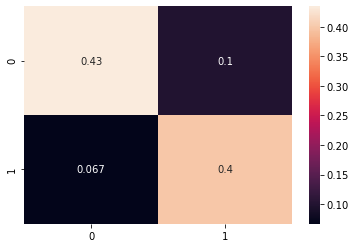

In [133]:
def plot_roc_curve(fper, tper, name):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve '+ name)
    plt.legend()
    plt.show()

# seperate the variables and labels, x and y respectively
x = studentInfoEdited.drop("Completed_Course", axis=1)
y = studentInfoEdited["Completed_Course"]

# make the test and training sets
# this method will split the data and the training set with the training set being identical always
# it also will split them both so that they are representative of the whole dataset
x_training_data, x_testing_data, y_training_labels, y_testing_labels = train_test_split(x, y, test_size=0.2, random_state=17)
# train the model for logistic regression
logRModel = LogisticRegression(solver='lbfgs', max_iter=20000)
logRModel.fit(x_training_data, y_training_labels)
# test the model
predictions = logRModel.predict(x_testing_data)

# see how accurate it is on the test set
print(accuracy_score(y_testing_labels, predictions))
cfm = confusion_matrix(y_testing_labels, predictions)
sns.heatmap(cfm/np.sum(cfm), annot=True)

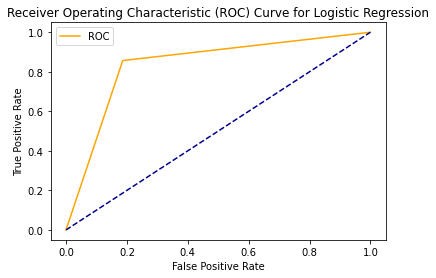

0.835208326829919

In [134]:
fper, tper, thresholds = roc_curve(y_testing_labels, predictions) 
plot_roc_curve(fper, tper, 'for Logistic Regression')

metrics.auc(fper, tper)

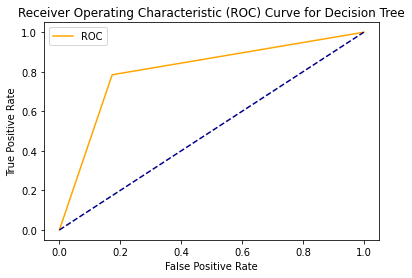

0.8057781637709074

In [140]:
model = DecisionTreeRegressor()
model.fit(x_training_data, y_training_labels)
predictions = model.predict(x_testing_data)
    
probs = model.predict(x_testing_data)
# probs = probs[:, 1]
fper, tper, thresholds = roc_curve(y_testing_labels, probs) 
plot_roc_curve(fper, tper, 'for Decision Tree')

metrics.auc(fper, tper)

2302

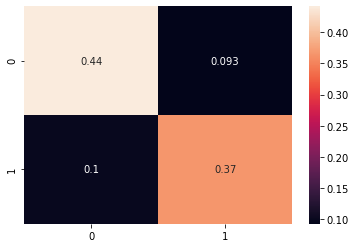

In [161]:
cfm = confusion_matrix(y_testing_labels, predictions)
sns.heatmap(cfm/np.sum(cfm), annot=True)


In [139]:
print(accuracy_score(y_testing_labels, predictions))

0.8075273939971415


In [165]:
print(cfm[0][0])
print(cfm[0][1])
print(cfm[1][0])
print(cfm[1][1])

2781
583
631
2302
